# Grover Algorithm without noise 

In [1]:
using LinearAlgebra
using Random

# Define Hadamard matrix
H = 1/sqrt(2) * [1 1; 1 -1]

# Function to generate tensor product of Hadamard gates for n qubits
function Hadamard_gate(n::Int)
    Hn = H
    for _ in 2:n
        Hn = kron(Hn, H)
    end
    return Hn
end

# Define function f(x) 
function f(x::Int, target_state::Int)::Int
    return x == target_state ? 1 : 0
end

# Construct the oracle matrix U_f
function construct_oracle(num_qubits::Int, target_state::Int)
    U_f = Matrix{ComplexF64}(I(2^num_qubits))
    for x in 0:(2^num_qubits - 1)
        U_f[x+1, x+1] = (-1)^f(x, target_state)
    end
    return U_f
end

# Construct Grover diffusion operator
function grover_diffusion_operator(num_qubits::Int)
    N = 2^num_qubits
    D = 2 * ones(ComplexF64, N, N) / N - I(N)
    return D
end

# Perform Grovers algorithm stepp
function grover_steps(num_qubits::Int, target_state::Int, num_iterations::Int; verbose=false)
    # Initialize the state |000...0>
    state = zeros(ComplexF64, 2^num_qubits)
    state[1] = 1.0
    
    # Apply Hadamard gates to all qubits
    Hn = Hadamard_gate(num_qubits)
    state = Hn * state
    
    # Construct the oracle and diffusion operators
    U_f = construct_oracle(num_qubits, target_state)
    D = grover_diffusion_operator(num_qubits)
    
    # Perform Grover iterations
    for iter in 1:num_iterations
        state = U_f * state
        
        state = D * state
       
    end
    
    return state
end

# Function to measure the probability of  target state
function measure_probability(state::Vector{ComplexF64}, target_state::Int)::Float64
    return abs2(state[target_state + 1])
end

# Perform Grovers algorithm and benchmark number of iterations
function benchmark_grover(num_qubits::Int, target_state::Int, max_iterations::Int)
    for num_iterations in 1:max_iterations
        final_state = grover_steps(num_qubits, target_state, num_iterations, verbose=false)
        probability = measure_probability(final_state, target_state)
        println("Iterations: $num_iterations, Probability of target state: $probability")
    end
end
num_iterations = 10
# Number of qubits
num_qubits = 4

# target state for the oracle
target_state = 2  

# Perform Grovers algorithm steps
final_state = grover_steps(num_qubits, target_state, num_iterations)

# Print final state vector
 println("Final State after Grover's algorithm:")
display(final_state)

# Benchmark probabilities over each iteration
benchmark_grover(num_qubits, target_state, num_iterations)

Final State after Grover's algorithm:


16-element Vector{ComplexF64}:
 0.14448666572570806 + 0.0im
 0.14448666572570806 + 0.0im
 -0.8287665843963624 + 0.0im
 0.14448666572570798 + 0.0im
 0.14448666572570804 + 0.0im
 0.14448666572570806 + 0.0im
   0.144486665725708 + 0.0im
   0.144486665725708 + 0.0im
 0.14448666572570792 + 0.0im
 0.14448666572570795 + 0.0im
   0.144486665725708 + 0.0im
   0.144486665725708 + 0.0im
 0.14448666572570806 + 0.0im
 0.14448666572570806 + 0.0im
   0.144486665725708 + 0.0im
   0.144486665725708 + 0.0im

Iterations: 1, Probability of target state: 0.4726562499999997
Iterations: 2, Probability of target state: 0.9084472656249996
Iterations: 3, Probability of target state: 0.9613189697265621
Iterations: 4, Probability of target state: 0.5817041397094723
Iterations: 5, Probability of target state: 0.12549167871475203
Iterations: 6, Probability of target state: 0.020380768924951602
Iterations: 7, Probability of target state: 0.36491288826800894
Iterations: 8, Probability of target state: 0.836089174859808
Iterations: 9, Probability of target state: 0.9921818600205372
Iterations: 10, Probability of target state: 0.686854051412013


# Grover with phase flip included in the Oracle

In [3]:
using LinearAlgebra
using Random

num_iterations = 7

noise_strength = 0.3*pi

num_qubits = 6

# Define target state for the oracle
target_state = 2  

# Define Hadamard matrix
H = 1/sqrt(2) * [1 1; 1 -1]

# Function to generate tensor product of Hadamard gates for n qubits
function Hadamard_gate(n::Int)
    Hn = H
    for _ in 2:n
        Hn = kron(Hn, H)
    end
    return Hn
end

# Define function f(x) 
function f(x::Int, target_state::Int)::Int
    return x == target_state ? 1 : 0
end

# Define the phase shift theta(x) 
function theta(x::Int, target_state::Int, noise_strength::Float64)
    if x == target_state
        return pi + noise_strength * (rand() - 0.5)  # Add noise around pi phase and shifts target with pi 
    else
        return noise_strength * (rand() - 0.5)  # Add noise around 0 phase
    end
end

# Construct the noisy oracle matrix U_f
function construct_noisy_oracle(num_qubits::Int, target_state::Int, noise_strength::Float64)
    U_f = Matrix{ComplexF64}(I(2^num_qubits))
    for x in 0:(2^num_qubits - 1)
        U_f[x+1, x+1] = exp(im * theta(x, target_state, noise_strength))
    end
    return U_f
end

# Grover diffusion operator
function grover_diffusion_operator(num_qubits::Int)
    N = 2^num_qubits
    D = 2 * ones(ComplexF64, N, N) / N - I(N)
    return D
end

# Perform Grover's algorithm with noisy oracle
function grover_steps_noisy(num_qubits::Int, target_state::Int, num_iterations::Int, noise_strength::Float64; verbose=false)
    # Initialize the state |000...0>
    state = zeros(ComplexF64, 2^num_qubits)
    state[1] = 1.0
    #1
    Hn = Hadamard_gate(num_qubits)
    state = Hn * state
    #2
    U_f = construct_noisy_oracle(num_qubits, target_state, noise_strength)
    #3
    D = grover_diffusion_operator(num_qubits)
    
    # Perform Grover iterations
    for iter in 1:num_iterations
        state = U_f * state
    
        
        state = D * state
        
    end
    
    return state
end

# Function to measure the probability of the target state
function measure_probability(state::Vector{ComplexF64}, target_state::Int)::Float64
    return abs2(state[target_state + 1])
end

# Perform Grover's algorithm and benchmark the number of iterations with noisy oracle
function benchmark_grover_noisy(num_qubits::Int, target_state::Int, max_iterations::Int, noise_strength::Float64)
    for num_iterations in 1:max_iterations
        final_state = grover_steps_noisy(num_qubits, target_state, num_iterations, noise_strength, verbose=false)
        probability = measure_probability(final_state, target_state)
        println("Iterations: $num_iterations, Probability of target state: $probability, Noise Strength: $noise_strength")
    end
end


# final state vector
final_state_noisy = grover_steps_noisy(num_qubits, target_state, num_iterations, noise_strength)

 println("Final State after Grover with noise :")
display(final_state_noisy)

#benchmark each probability
benchmark_grover_noisy(num_qubits, target_state, num_iterations, noise_strength)


Final State after Grover with noise :


64-element Vector{ComplexF64}:
  0.05136281266771972 - 0.08456794023104929im
    0.053832954927271 - 0.0762896104499856im
 0.029272412437154446 + 0.474930538593695im
  0.05658821217736734 - 0.10023239079492428im
   0.0514899489165723 - 0.09073626403860319im
  0.05146175336953106 - 0.08382517144660834im
  0.07171963702052783 - 0.06131213090606286im
  0.05356485395455343 - 0.07685342006312365im
  0.06479011828203893 - 0.1013119597996321im
  0.06587166025817587 - 0.10038737438217318im
 0.054457040257402556 - 0.0750907418275648im
  0.09379583783796155 - 0.06472454425548858im
  0.06746189303158538 - 0.06293458311795957im
                      ⋮
  0.05753041553291538 - 0.08308216901272847im
  0.09264132006520436 - 0.06391531910016754im
 0.055811066221628125 - 0.09954671730790146im
  0.06709195004024111 - 0.09336069123593341im
  0.05971246231080728 - 0.10190701895748783im
  0.05172481991877011 - 0.08236677464783387im
   0.0995816948946794 - 0.08306555629132671im
   0.1005893264748522 - 0.0753

Iterations: 1, Probability of target state: 0.12778445822057824, Noise Strength: 0.9424777960769379
Iterations: 2, Probability of target state: 0.30665149655268786, Noise Strength: 0.9424777960769379
Iterations: 3, Probability of target state: 0.5156673855382626, Noise Strength: 0.9424777960769379
Iterations: 4, Probability of target state: 0.6758547961161788, Noise Strength: 0.9424777960769379
Iterations: 5, Probability of target state: 0.9251993862703594, Noise Strength: 0.9424777960769379
Iterations: 6, Probability of target state: 0.9813576760912108, Noise Strength: 0.9424777960769379
Iterations: 7, Probability of target state: 0.670596834600489, Noise Strength: 0.9424777960769379


# Plot different noise level

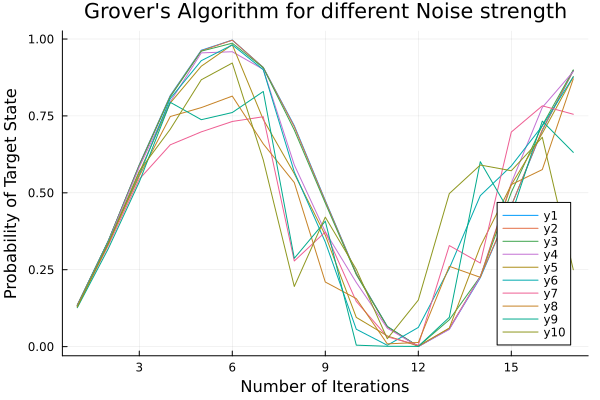

In [5]:
using Plots

# Perform Grovers algorithm and benchmark the number of iterations with noisy oracle
function benchmark_grover_noisy_all(num_qubits::Int, target_state::Int, max_iterations::Int, noise_strengths::Vector{Float64})
   #store al probabilities
    probabilities_matrix = []

    # Iterate over each noise strength
    for noise_strength in noise_strengths
        probabilities = Float64[]
        
        for num_iterations in 1:max_iterations
            final_state = grover_steps_noisy(num_qubits, target_state, num_iterations, noise_strength, verbose=false)
            probability = measure_probability(final_state, target_state)
            push!(probabilities, probability)
        end
        
        #put the collected probabilities to the matrix
        push!(probabilities_matrix, probabilities)
    end
    
    # Convert to array for easier manipulation and plotting
    probabilities_matrix = hcat(probabilities_matrix...)

    # Generate x values (iterations)
    x = 1:max_iterations

    # Plot all the data in one plot
    plot(x, probabilities_matrix, xlabel="Number of Iterations", ylabel="Probability of Target State",
         title="Grover's Algorithm for different Noise strength", lw=1)
end

# Define parameters
num_points = 10
num_iterations = 17
noise_strengths = collect(range(0, stop=0.3, length=num_points) .* π)
#noise_strengths = [0.0 , 0.1*pi, 0.4*pi, 1.0*pi, 2.1*pi , 2.2*pi, 23*pi]
#noise_strengths = [0.0, 0.1*pi, 0.2*pi, 0.3*pi, 0.4*pi]
num_qubits = 6
target_state = 4

# Perform the benchmark and plot the results for all noise strengths
benchmark_grover_noisy_all(num_qubits, target_state, num_iterations, noise_strengths)


# Plot Final state after optimal iteration depending on noise strength

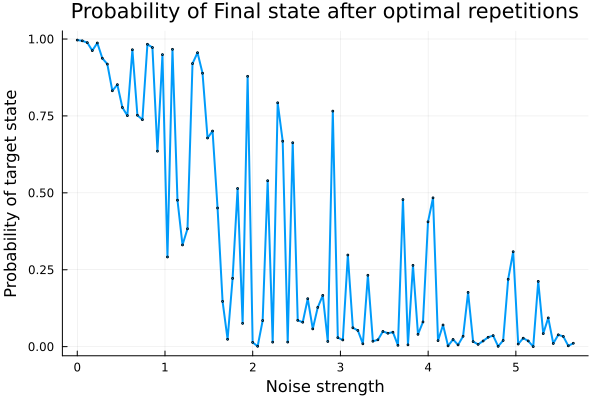

In [7]:
using Plots

#Define Benchmark Function, which benchmark all the probabilties of different noise strengths after optimal iteration
function benchmark_grover_noisy_optimal(num_qubits::Int, target_state::Int, noise_strengths::Vector{Float64})
  
    #optimal number of iteration
    optimal_iterations = round(Int, sqrt(2^num_qubits)*0.25*pi) 

    #store probabilities
    probabilities = Float64[]

    # Iterate over each noise strength
    for noise_strength in noise_strengths
        final_state = grover_steps_noisy(num_qubits, target_state, optimal_iterations, noise_strength, verbose=false)
        probability = measure_probability(final_state, target_state)
        push!(probabilities, probability)
    end

    # Plot the data
    plot(noise_strengths, probabilities, xlabel="Noise strength", ylabel="Probability of target state",
         title="Probability of Final state after optimal repetitions", legend=false, lw=2, marker=:o, ms = 1)
end

#parameters
num_qubits = 6

target_state = 2

num_points = 100

noise_strengths = collect(range(0, stop=1.8, length=num_points) .* π)

# Perform the whole plot
benchmark_grover_noisy_optimal(num_qubits, target_state, noise_strengths)

# Monte Carlo Simulation combining with averaging for more stable Graph


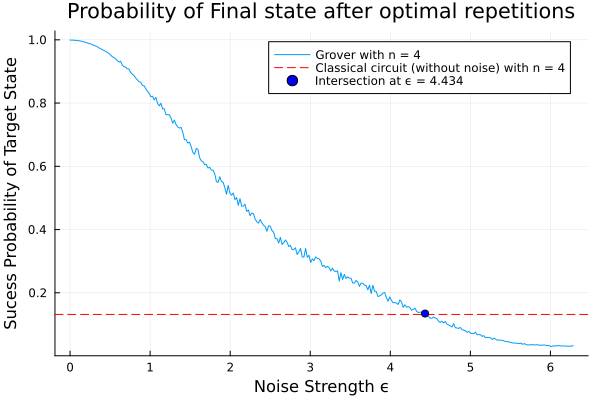

In [12]:
using Plots
using Statistics
# Define parameters
num_qubits = 5
target_state = 2
num_points = 300
noise_strengths = collect(range(0, stop=2.0, length=num_points) .* π)
num_runs = 1000  # Number of runs for averaging

# Define Benchmark Function
function benchmark_grover_noisy_optimal(num_qubits::Int, target_state::Int, noise_strengths::Vector{Float64}, num_runs::Int)
    # Optimal number of iterations
    optimal_iterations = round(Int, sqrt(2^num_qubits) * 0.25 * π)

    # Store mean probabilities
    mean_probabilities = Float64[]

    # Iterate over each noise strength
    for noise_strength in noise_strengths
        
        # Store probabilities for each run
        run_probabilities = Float64[]

        # Run algorithm multiple times and calculate the average probability
        for _ in 1:num_runs
            final_state = grover_steps_noisy(num_qubits, target_state, optimal_iterations, noise_strength, verbose=false)
            probability = measure_probability(final_state, target_state)
            push!(run_probabilities, probability)
        end

        # Calculate the mean probability for current noise strength
        mean_probability = mean(run_probabilities)
        push!(mean_probabilities, mean_probability)
    end

    # Plot the data
    plot(noise_strengths, mean_probabilities, xlabel="Noise Strength ϵ", ylabel="Sucess Probability of Target State",
         title="Probability of Final state after optimal repetitions", label="Grover with n = 4", lw = 1)

    return noise_strengths, mean_probabilities
end

# Perform the benchmark and get the data
noise_strengths, mean_probabilities = benchmark_grover_noisy_optimal(num_qubits, target_state, noise_strengths, num_runs)

# Add the prob.
classical_threshold = 1 - (1 - 1/2^num_qubits)^((π/4)*sqrt(2^num_qubits))
hline!([classical_threshold], label="Classical circuit (without noise) with n = 4", linestyle=:dash, color=:red)

# Find the intersection point
diff = mean_probabilities .- classical_threshold
cross_indices = findall(diff[1:end-1] .* diff[2:end] .<= 0) #findall finds the entry where the value of diff = 0

# Get intersection point, choosing the first intersection if there are multiple
if !isempty(cross_indices)
    intersect_index = cross_indices[1]
    intersect_x = noise_strengths[intersect_index]
    intersect_y = mean_probabilities[intersect_index]

    # Mark the intersection point and display x value in the legend
    scatter!([intersect_x], [intersect_y], label="Intersection at ϵ = $(round(intersect_x, digits=3))", color=:blue, marker=:circle)
end



## Using different noise models and benchmark

## Simulate for different noise probabilties for each model

## Monte Carlo with average 

Running with Multiple Noise Models:


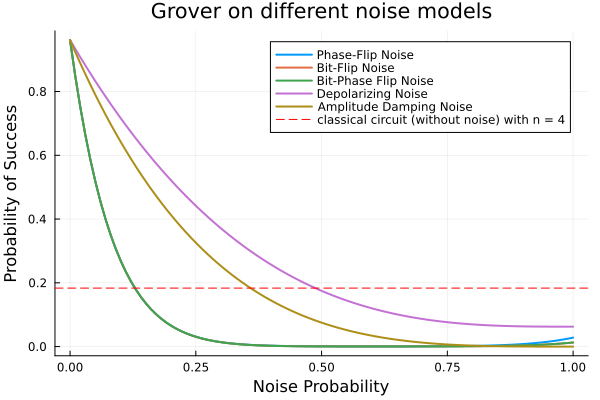

In [26]:
using LinearAlgebra
using Random
using Plots

# Define the Hadamard matrix
H = 1/sqrt(2) * [1 1; 1 -1]
e = 0.0 #noisestrength

# Function to generate tensor product of Hadamard gates for n qubits
function hadamard_gatee(n::Int)
    Hn = H
    for _ in 2:n
        Hn = kron(Hn, H)
    end
    return Hn
end

# phase shift theta(x)
function thetaa(x::Int, target_state::Int, noisestrength::Float64)
    if x == target_state
        return pi + noisestrength * (rand() - 0.5)  
    else
        return noisestrength * (rand() - 0.5)  
    end
end

# Construct the noisy oracle matrix U_f
function construct_noisy_oraclee(num_qubits::Int, target_state::Int, noisestrength::Float64)
    U_f = Matrix{ComplexF64}(I(2^num_qubits))
    for x in 0:(2^num_qubits - 1)
        U_f[x+1, x+1] = exp(im * thetaa(x, target_state, noisestrength))
    end
    return U_f
end

# Construct the Grover diffusion operator
function grover_diffusion_operatorr(num_qubits::Int)
    N = 2^num_qubits
    D = 2 * ones(ComplexF64, N, N) / N - I(N)
    return D
end

# Noise models as functions using Kraus operators

# Phase-flip noise
function phase_flip_noise(ρ::Matrix{ComplexF64}, noise_prob::Float64)
    #Kraus operators
    K0 = sqrt(1 - noise_prob) * I(2) 
    K1 = sqrt(noise_prob) * [1.0 0.0; 0.0 -1.0]  # Pauli-Z matrix
    num_qubits = Int(log2(size(ρ, 1)))
    K0_expanded = kron([K0 for _ in 1:num_qubits]...)
    K1_expanded = kron([K1 for _ in 1:num_qubits]...)
    ρ_new = K0_expanded * ρ * K0_expanded' + K1_expanded * ρ * K1_expanded'
    return ρ_new
end

# Bit-flip noise
function bit_flip_noise(ρ::Matrix{ComplexF64}, noise_prob::Float64)
    K0 = sqrt(1 - noise_prob) * I(2)
    K1 = sqrt(noise_prob) * [0.0 1.0; 1.0 0.0]  # Pauli-X matrix
    num_qubits = Int(log2(size(ρ, 1)))
    K0_expanded = kron([K0 for _ in 1:num_qubits]...)
    K1_expanded = kron([K1 for _ in 1:num_qubits]...)
    ρ_new = K0_expanded * ρ * K0_expanded' + K1_expanded * ρ * K1_expanded'
    return ρ_new
end

# Bit-phase flip noise
function bit_phase_flip_noise(ρ::Matrix{ComplexF64}, noise_prob::Float64)
    K0 = sqrt(1 - noise_prob) * I(2)
    K1 = sqrt(noise_prob) * [0 -im; -im 0]  # Y Pauli
    num_qubits = Int(log2(size(ρ, 1)))
    K0_expanded = kron([K0 for _ in 1:num_qubits]...)
    K1_expanded = kron([K1 for _ in 1:num_qubits]...)
    ρ_new = K0_expanded * ρ * K0_expanded' + K1_expanded * ρ * K1_expanded'
    return ρ_new
end

# Depolarizing noise
function depolarizing_noise(ρ::Matrix{ComplexF64}, noise_prob::Float64)
    d = size(ρ, 1)  # Dimension of the Hilbert space
    identity_matrix = Matrix{ComplexF64}(I(d))
    
    # Apply the depolarizing channel: E(ρ) = p/d * I + (1 - p) * ρ
    ρ_new = (noise_prob / d) * identity_matrix + (1 - noise_prob) * ρ
    
    return ρ_new
end

# Amplitude damping noise
function amplitude_damping_noise(ρ::Matrix{ComplexF64}, γ::Float64)
    K0 = [1 0; 0 sqrt(1 - γ)]
    K1 = [0 sqrt(γ); 0 0]
    num_qubits = Int(log2(size(ρ, 1)))
    K0_expanded = kron([K0 for _ in 1:num_qubits]...)
    K1_expanded = kron([K1 for _ in 1:num_qubits]...)
    ρ_new = K0_expanded * ρ * K0_expanded' + K1_expanded * ρ * K1_expanded'
    return ρ_new
end

# Perform Grover for each noise model
function grover_step_with_noise(num_qubits::Int, target_state::Int, num_iterations::Int, noise_prob::Float64, noise_model::Symbol; verbose=false)
    state = zeros(ComplexF64, 2^num_qubits, 2^num_qubits)
    state[1, 1] = 1.0
    Hn = hadamard_gatee(num_qubits)
    state = Hn * state * Hn'
    
    U_f = construct_noisy_oraclee(num_qubits, target_state, e)
    D = grover_diffusion_operatorr(num_qubits)
    
    for iter in 1:num_iterations  #Build to apply different models
        state = U_f * state * U_f'
         state = D * state * D'
        if noise_model == :phase_flip
            state = phase_flip_noise(state, noise_prob)
        elseif noise_model == :bit_flip
            state = bit_flip_noise(state, noise_prob)
        elseif noise_model == :bit_phase_flip
            state = bit_phase_flip_noise(state, noise_prob)
        elseif noise_model == :depolarizing
            state = depolarizing_noise(state, noise_prob)
        elseif noise_model == :amplitude_damping
            state = amplitude_damping_noise(state, noise_prob)
        end
        

    end
    
    return state
end

#measure the probability of the target state
function measure_probability(state::Matrix{ComplexF64}, target_state::Int)::Float64
    return real(state[target_state + 1, target_state + 1])
end

# function to benchmark grovers algorithm over different noise probabilities with Monte Carlo averaging
function benchmark_grover_over_noise(num_qubits::Int, target_state::Int, num_iterations::Int, noise_probs::Vector{Float64}, noise_model::Symbol, num_trials::Int=100)
    probabilities = Float64[]
    
    for noise_prob in noise_probs
        trial_probs = Float64[]
        
        for _ in 1:num_trials
            final_state = grover_step_with_noise(num_qubits, target_state, num_iterations, noise_prob, noise_model, verbose=false)
            probability = measure_probability(final_state, target_state)
            push!(trial_probs, probability)
        end
        
        push!(probabilities, mean(trial_probs))  # Average over trials
    end
    
    return probabilities
end

# Parameters
num_qubits = 4
target_state = 2
num_iterations = round(Int, pi/4 * sqrt(2^num_qubits))  #optimal number of iterations
noise_probs = collect(range(0, stop=1.0, length=100))  # Range of noise probabilities
num_trials = 1 # Number of Monte Carlo trials for averaging

println("Running with Multiple Noise Models:")

# Collect probabilities for different noise models with Monte Carlo averaging
phase_flip_probs = benchmark_grover_over_noise(num_qubits, target_state, num_iterations, noise_probs, :phase_flip, num_trials)
bit_flip_probs = benchmark_grover_over_noise(num_qubits, target_state, num_iterations, noise_probs, :bit_flip, num_trials)
bit_phase_flip_probs = benchmark_grover_over_noise(num_qubits, target_state, num_iterations, noise_probs, :bit_phase_flip, num_trials)
depolarizing_probs = benchmark_grover_over_noise(num_qubits, target_state, num_iterations, noise_probs, :depolarizing, num_trials)
amplitude_damping_probs = benchmark_grover_over_noise(num_qubits, target_state, num_iterations, noise_probs, :amplitude_damping, num_trials)

# Plot results
plot(noise_probs, phase_flip_probs, label="Phase-Flip Noise", lw=2)
plot!(noise_probs, bit_flip_probs, label="Bit-Flip Noise", lw=2)
plot!(noise_probs, bit_phase_flip_probs, label="Bit-Phase Flip Noise", lw=2)
plot!(noise_probs, depolarizing_probs, label="Depolarizing Noise", lw=2)
plot!(noise_probs, amplitude_damping_probs, label="Amplitude Damping Noise", lw=2)
hline!([1 - (1 - 1/2^num_qubits)^((pi/4)*sqrt(2^num_qubits))], label="classical circuit (without noise) with n = 4", linestyle=:dash, color=:red)

xlabel!("Noise Probability")
ylabel!("Probability of Success")
title!("Grover on different noise models")

# Depolarizing Noise vs theoretical curve

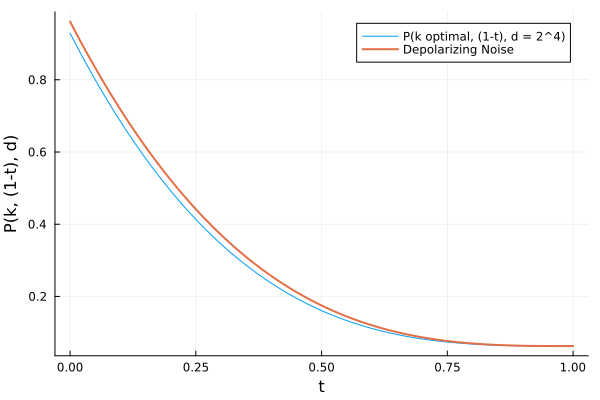

In [19]:
using Plots

# Define the function P(k, (1-t), d)
function P(k, t, d)
    return (1 - t^k) * (1 / d) + t^k * sin((2k + 1) * asin(1 / sqrt(d)))^2
end

# Define values for k and d
k = pi*sqrt(2^4)*0.25
d = 2^4

# Define a range for t (1-t is the variable, so t should range from 0 to 1)
t_values = 0:0.01:1

# Compute and plot the function for different values of t
plot(t_values, [P(k, 1 - t, d) for t in t_values], label="P(k optimal, (1-t), d = 2^4)", xlabel="t", ylabel="P(k, (1-t), d)")
plot!(noise_probs, depolarizing_probs, label="Depolarizing Noise", lw=2)
